# 转换为低纬

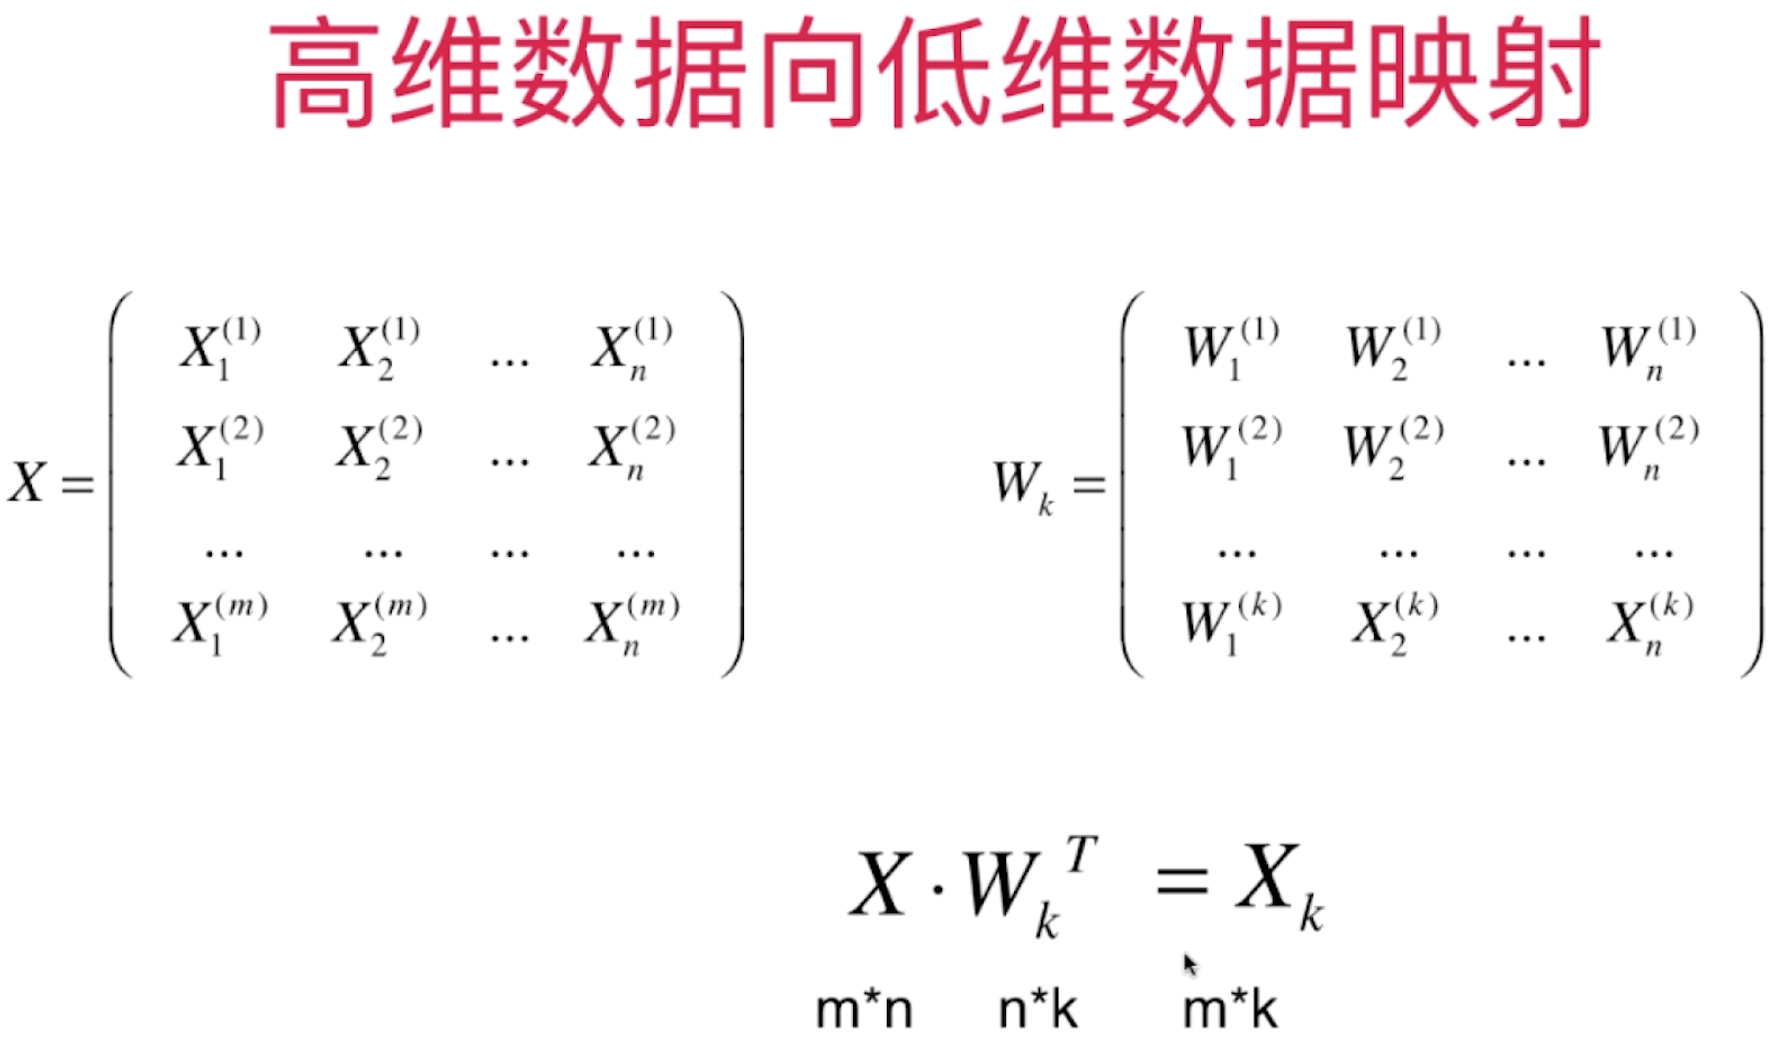

# 还原回高纬（会损失数据？）

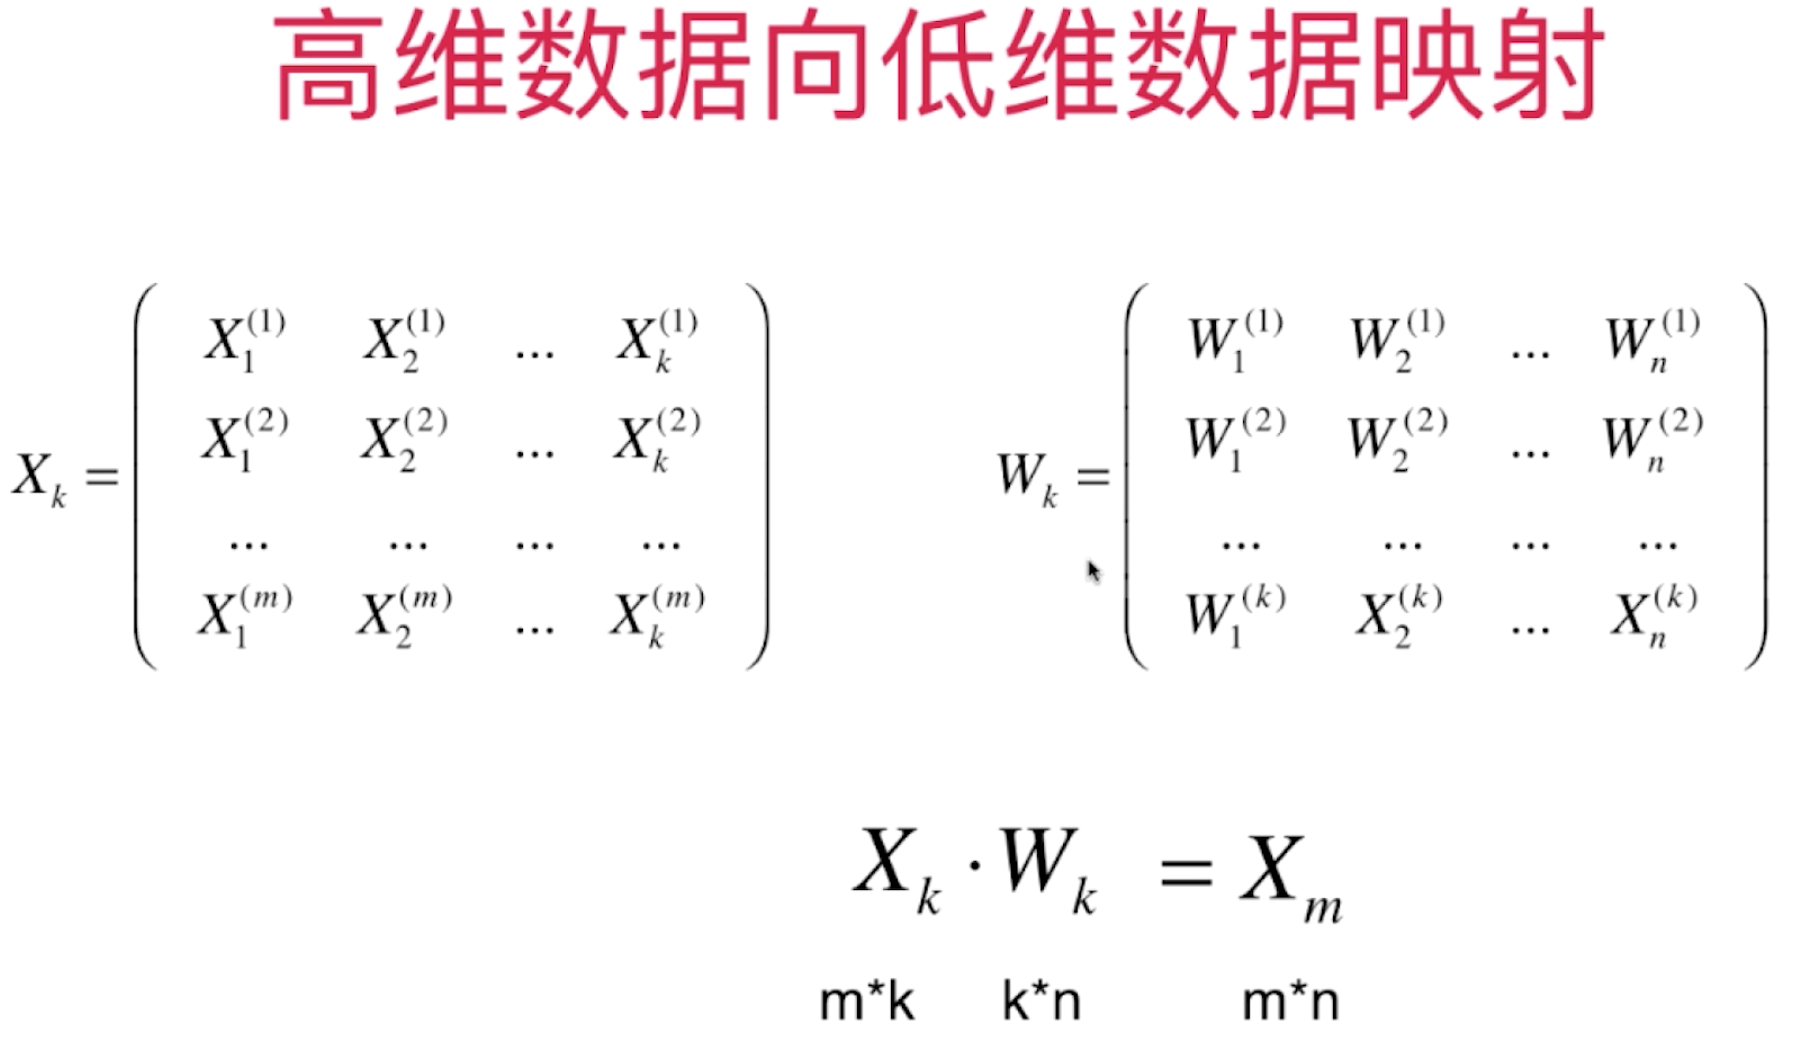

In [31]:
import numpy as np


class PCA:
    
    def __init__(self, n_components):
        """初始化PCA"""
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None
        
    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components
    
    def fit(self, X, eta=0.01, n_iters=1e4):
        """获得数据集X的前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"
        
        def demean(X):
            """求每行的均值"""
            return X - np.mean(X, axis = 0)
        
        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)
        
        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)
        
        def direction(w):
            return w / np.linalg.norm(w)
        
        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):
            w = direction(initial_w)
            cur_iter = 0
            
            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if abs(f(w, X) - f(last_w, X)) < epsilon:
                    break
                    
                cur_iter += 1
                
            return w
        
        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i, :] = w
            
            X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
        
        return self
    
    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]
        
        return X.dot(self.components_.T)
    
    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]
        
        return X.dot(self.components_)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
X = np.empty((100, 2))   # 里面的数字应该是内存的原本内容
X[:,0] = np.random.uniform(0., 100., size=100)   # 0 - 100 的实数
X[:,1]  = 0.75 * X[:,0] + 3. + np.random.normal(0, 10. , size=100)

In [34]:
pca = PCA(n_components=2) #2个主成分
pca.fit(X)

PCA(n_components=2)

In [35]:
pca.components_

array([[ 0.76164147,  0.64799867],
       [ 0.64800185, -0.76163876]])

In [36]:
pca = PCA(n_components=1)   #1个主成分
pca.fit(X)

PCA(n_components=1)

In [39]:
X_reduction = pca.transform(X)
print(X.shape)
print(X_reduction.shape)  #说明降维了

(100, 2)
(100, 1)


In [40]:
X_restore = pca.inverse_transform(X_reduction)  #还原过程
print(X_restore.shape)

(100, 2)


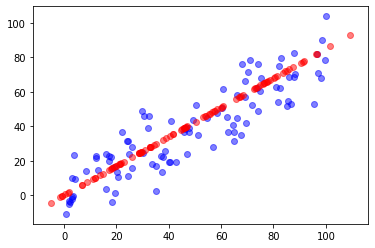

In [41]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()          #### 说明无法完全还原，降维是丢失信息的（为什么？？？？矩阵计算不是正确的吗？？？